In [1]:
# BIBLIOTECAS NECESARIAS

# Bibliotecas para operaciones numéricas y manejo de datos
import numpy as np  # Operaciones numéricas
import pandas as pd  # Manejo de datos en formato tabular

# División del conjunto de datos y validación cruzada
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modelos de clasificación
from sklearn.ensemble import RandomForestClassifier

# Importar todo el módulo de métricas
import sklearn.metrics

# Métricas de evaluación y reportes
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    roc_curve, auc,
    classification_report,
    accuracy_score, precision_score, recall_score, f1_score
)

# Bibliotecas para gráficos
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos estadísticos, con menos código que matplotlib
import plotly.express as px  # Gráficos interactivos con interfaz sencilla y de alto nivel
import plotly.graph_objects as go  # Gráficos interactivos con interfaz más detallada y de bajo nivel

# Herramientas para iteradores
import itertools  # Herramientas funcionales para crear y utilizar iteradores

# Herramientas para preprocesamiento de datos y evaluación de modelos
from sklearn.preprocessing import StandardScaler  # Escalado de características para normalizar datos
from sklearn.model_selection import learning_curve  # Generación de curvas de aprendizaje para evaluar el rendimiento del modelo
from sklearn.model_selection import validation_curve  # Generación de curvas de validación para evaluar el rendimiento del modelo

In [2]:
credit_card = pd.read_csv('D:\\ISA\\default_of_credit_card_clients.csv', sep=';')

In [3]:
credit_card.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
# Paso 1: Separar características (X) y la columna objetivo (y)
X = credit_card.drop(['Y'], axis=1)  # Eliminar la columna 'Y'
y = credit_card['Y']  # Conservar la columna 'Y'

# Paso 2: Crear un objeto StandardScaler
scaler = StandardScaler()

# Paso 3: Ajustar el escalador a las características y transformarlas
scaled = scaler.fit_transform(X)

# Paso 4: Convertir X_scaled de vuelta a un DataFrame
X_scaled = pd.DataFrame(scaled, columns=X.columns)

# Paso 5: Reunir X_scaled con la columna 'Class'
credit_card_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

# Paso 6: Mostrar las primeras filas del DataFrame transformado
print(credit_card_scaled.head())

         X1        X2        X3        X4        X5        X6        X7  \
0 -1.136720  0.810161  0.185828 -1.057295 -1.246020  1.794564  1.782348   
1 -0.365981  0.810161  0.185828  0.858557 -1.029047 -0.874991  1.782348   
2 -0.597202  0.810161  0.185828  0.858557 -0.161156  0.014861  0.111736   
3 -0.905498  0.810161  0.185828 -1.057295  0.164303  0.014861  0.111736   
4 -0.905498 -1.234323  0.185828 -1.057295  2.334029 -0.874991  0.111736   

         X8        X9       X10  ...       X15       X16       X17       X18  \
0 -0.696663 -0.666599 -1.530046  ... -0.672497 -0.663059 -0.652724 -0.341942   
1  0.138865  0.188746  0.234917  ... -0.621636 -0.606229 -0.597966 -0.341942   
2  0.138865  0.188746  0.234917  ... -0.449730 -0.417188 -0.391630 -0.250292   
3  0.138865  0.188746  0.234917  ... -0.232373 -0.186729 -0.156579 -0.221191   
4 -0.696663  0.188746  0.234917  ... -0.346997 -0.348137 -0.331482 -0.221191   

        X19       X20       X21       X22       X23  Y  
0 -0.227086

In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_scaled,y)

credit_card_resampled = pd.DataFrame(X_resampled, columns=X.columns)
credit_card_resampled['Y'] = y_resampled

print(credit_card_resampled.head())
print(credit_card_resampled['Y'].value_counts())

             X1        X2        X3        X4        X5        X6        X7  \
7510   1.637943  0.810161  1.451114  0.858557 -0.486615 -0.874991 -0.723570   
15325  0.558907  0.810161  0.185828 -1.057295 -0.052670 -1.764843 -1.558876   
18666 -0.905498  0.810161 -1.079457  0.858557 -1.354506 -0.874991 -0.723570   
7494   1.252573 -1.234323 -1.079457  0.858557 -0.378129  0.014861  0.111736   
1239  -0.674276  0.810161  0.185828 -1.057295 -0.052670 -0.874991 -0.723570   

             X8        X9       X10  ...       X15       X16       X17  \
7510  -0.696663 -0.666599 -0.647565  ... -0.499224 -0.457733 -0.423013   
15325 -1.532192 -1.521944 -1.530046  ... -0.584858 -0.620589 -0.583425   
18666 -1.532192 -1.521944 -1.530046  ... -0.672497 -0.663059 -0.652724   
7494   0.138865  0.188746  0.234917  ...  1.526307  1.189575  1.383139   
1239  -0.696663 -0.666599 -0.647565  ... -0.666342 -0.656545 -0.646075   

            X18       X19       X20       X21       X22       X23  Y  
7510   0.

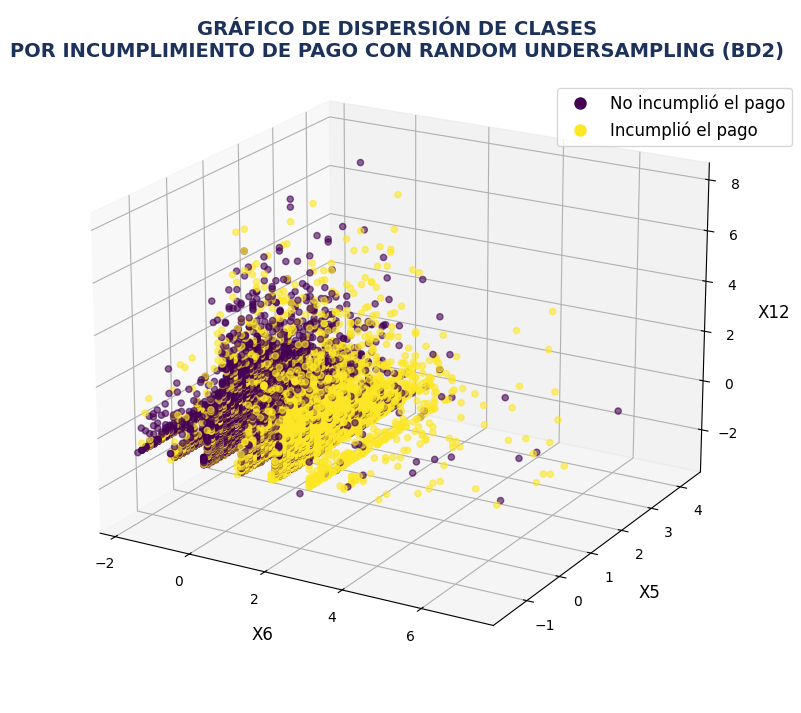

In [6]:
from matplotlib.lines import Line2D  # Para crear la leyenda personalizada
# VISUALIZACIÓN 3D DE LA DISTRIBUCIÓN DE CLASES EN DATOS DE TRANSACCIONES CON RUS

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(12, 9))  # Tamaño de la figura
ax = fig.add_subplot(111, projection='3d')  # Crear un eje 3D en la figura

# Usar el colormap 'viridis' para asignar colores a las clases
cmap = plt.cm.viridis  # Cargar el colormap 'viridis', que asigna colores a las clases

# Definir colores específicos para cada clase (clase 0 y clase 1)
# Usamos el color más oscuro para la clase 0 y el amarillo para la clase 1
colors = [cmap(0), cmap(0.999999)]  # Primer color para clase 0, segundo color (amarillo) para clase 1

# Crear el gráfico de dispersión 3D, asignando colores según las clases
scatter = ax.scatter(
    X_resampled.iloc[:, 5],  # Coordenada X usando la columna 14 de X_scaled
    X_resampled.iloc[:, 4],  # Coordenada Y usando la columna 17 de X_scaled
    X_resampled.iloc[:, 11],  # Coordenada Z usando la columna 10 de X_scaled
    c=y_resampled,  # Asignar colores a los puntos basados en la variable 'y' (las clases)
    cmap=plt.cm.colors.ListedColormap(colors),  # Aplicar el colormap personalizado
    alpha=0.6  # Ajustar la transparencia de los puntos
)

# Etiquetar los ejes con los nombres de las variables correspondientes
ax.set_xlabel('X6', fontsize=12, labelpad=10)
ax.set_zlabel('X12', fontsize=12, labelpad=10)
ax.set_ylabel('X5', fontsize=12, labelpad=10)

# Agregar un título claro y centrado al gráfico
plt.title(
    'GRÁFICO DE DISPERSIÓN DE CLASES\nPOR INCUMPLIMIENTO DE PAGO CON RANDOM UNDERSAMPLING (BD2)',  # Título con salto de línea
    fontsize=14,  # Tamaño de la fuente
    fontweight='bold',  # Poner el título en negrita
    color='#1C325B',  # Color azul oscuro
    loc='center',  # Centrar el título
    y=1  # Ajustar la posición vertical del título
)

# Ajustar la perspectiva del gráfico 3D para mejorar la visualización
ax.view_init(elev=20, azim=-60)  # Elevación y ángulo de azimut del gráfico 3D

# Crear los objetos de la leyenda con los colores definidos previamente para cada clase
handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=10),  # Clase 0 (no fraudulenta)
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=10)   # Clase 1 (fraudulenta)
]

etiq =  {0: f"No incumplió el pago", 1: f"Incumplió el pago"}

# Asignar las etiquetas correspondientes a las clases para la leyenda
labels = [etiq[0], etiq[1]]  # 'etiq' debe contener las etiquetas de las clases (asegurarse de que esté definida)

# Colocar la leyenda en la parte superior central del gráfico
ax.legend(
    handles=handles,  # Usar los objetos creados para la leyenda
    labels=labels,  # Etiquetas de las clases
    loc='upper center',  # Ubicación de la leyenda
    fontsize=12,  # Tamaño de la fuente de la leyenda
    title_fontsize=14,  # Tamaño de la fuente del título de la leyenda
    bbox_to_anchor=(0.9, 0.9)  # Posicionar la leyenda fuera del gráfico, en la parte derecha
)

# Mostrar el gráfico generado
plt.show()

In [8]:
# Calcula el recuento de las clases de transacción (no fraudulenta y fraudulenta) y los ordena por índice
class_counts = credit_card_resampled['Y'].value_counts().sort_index()

# Extrae los valores (recuentos) de las clases
valores = class_counts.values

# Define etiquetas para las clases (0: no fraudulenta, 1: fraudulenta)
# Estas etiquetas se utilizarán en el gráfico para representar cada segmento
etiq =  {0: f"pagó", 1: f"impago"}

# Crea un gráfico de pastel con Plotly Express
# 'values' representa el tamaño de cada segmento, y 'names' proporciona las etiquetas para cada segmento
fig = px.pie(credit_card_resampled, values=valores, names=etiq,
             title='<b>DISTRIBUCIÓN DE CLASES</b>',
             color_discrete_sequence=['#522258', '#FFE31A'],
             )

# Ajusta el tamaño del texto del porcentaje en el gráfico para mejorar la visibilidad
fig.update_traces(textinfo='percent', textfont_size=15)

# Centra el título y coloca la leyenda debajo del gráfico
fig.update_layout(
    title_x=0.5,  # Centra el título
    title_y=0.90,  # Ajusta la posición vertical del título
    showlegend=True,  # Activa la leyenda
    legend_orientation="h",  # Pone la leyenda horizontal
    legend_y=-0.05,  # Coloca la leyenda debajo del gráfico
    legend_x=0.2
)

# Muestra el gráfico
fig.show()

In [9]:
# 'HOLDOUT METHOD' para evaluar el rendimiento de un modelo de aprendizaje automático
# Este método divide el conjunto de datos en entrenamiento y prueba con diferentes tamaños de entrenamiento
# para evaluar cómo el rendimiento del modelo varía con el tamaño del conjunto de entrenamiento.

# Definir los diferentes tamaños para el conjunto de entrenamiento
train_sizes = [0.75,0.80,0.90]

# Crear una lista para almacenar los resultados de los diferentes conjuntos de entrenamiento y prueba
split_results = []

# Para cada tamaño de entrenamiento en train_sizes
for splits in train_sizes:
  # Se divide los datos X e y en conjuntos de entrenamiento y prueba con el tamaño especificado
  X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=splits, random_state=42)
  split_results.append((X_train, X_test, y_train, y_test))

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba para cada tamaño de entrenamiento
for i, (X_train, X_test, y_train, y_test) in enumerate(split_results):
  print(f"\033[1mConjunto con train_size={train_sizes[i]}\033[0m")
  print(f"Dimensión total es: {credit_card_resampled.shape}")
  print(f"X_train dimensión: {X_train.shape}, X_test dimensión: {X_test.shape}")
  print(f"y_train dimensión: {y_train.shape}, y_test dimensión: {y_test.shape}")
  print()

Conjunto con train_size=0.75
Dimensión total es: (13272, 24)
X_train dimensión: (9954, 23), X_test dimensión: (3318, 23)
y_train dimensión: (9954,), y_test dimensión: (3318,)

Conjunto con train_size=0.8
Dimensión total es: (13272, 24)
X_train dimensión: (10617, 23), X_test dimensión: (2655, 23)
y_train dimensión: (10617,), y_test dimensión: (2655,)

Conjunto con train_size=0.9
Dimensión total es: (13272, 24)
X_train dimensión: (11944, 23), X_test dimensión: (1328, 23)
y_train dimensión: (11944,), y_test dimensión: (1328,)



In [10]:
# MODELO RANDOM FOREST

# Lista para almacenar el resultado del modelo para cada conjunto de entrenamiento/prueba
models_split_results = []

# Iterar sobre los conjuntos generados
for i, (X_train, X_test, y_train, y_test) in enumerate(split_results):

  # Definir las métricas de evaluación
  scores = ["precision", "recall", "roc_auc", "f1", "average_precision"]

  # Mostrar información sobre el conjunto actual
  print(f"\033[1mConjunto con train_size={train_sizes[i]}:\033[0m")

  # Crear el modelo RANDOM FOREST
  modeloRF = RandomForestClassifier(
      n_jobs = -1, # Utilizar todos los núcleos disponibles para acelerar el entrenamiento
      random_state = 42 # Semilla para la reproducibilidad de los resultados
      )

  # Definir los parámetros para GridSearchCV
  grid_search = {
      "n_estimators": [10,12,14,16,18,20,50,100,200], # Número de árboles en el bosque aleatorio
      "criterion": ["gini", "entropy"], # Criterio para la selección del umbral de
      "max_features": ["sqrt","log2"], # Número máximo de características a considerar
      "max_depth": [10,20,30], # Profundidad máxima de cada
      "min_samples_split": [2,5,10], # Número mínimo de muestras requeridas para dividir un nodo interno
      "min_samples_leaf": [1,2,4] # Número mínimo de muestras requeridas en cada hoja
      }

  # Medir tiempo de ejecución
  start = pd.Timestamp.now()

  # Configuración de GridSearchCV
  grid = GridSearchCV(
      modeloRF,
      grid_search,
      cv=3, # Número de particiones en la validación cruzada
      refit=False, # No volver a entrenar el mejor modelo encontrado en toda la búsqueda
      scoring=scores, # Métricas de evaluación a usar
      verbose = 3, # Mostrar información adicional durante la búsqueda
      return_train_score=True # Devolver los resultados de entrenamiento
      )

  # Ejecutar GridSearchCV para encontrar el mejor modelo
  model_grid = grid.fit(X_train, y_train)

  # Medir tiempo de ejecución de GridSearchCV
  end = pd.Timestamp.now()
  print(f"Duración búsqueda: {end-start}")

  # Almacenar los resultados en la list 'models_split_results'
  models_split_results.append(model_grid.cv_results_)

  # Guardar modelos en un DataFrame
modelos_GSCV1= pd.DataFrame(models_split_results)

model_75 = models_split_results[0]
model_80 = models_split_results[1]
model_90 = models_split_results[2]

#75
# Crear una lista de diccionarios, donde cada diccionario corresponde a una ejecución
ajuste_modelo_75 = []

# Recorre cada índice 'i' basado en la longitud de los tiempos medios de ajuste ('mean_fit_time')
for i in range(len(model_75['mean_fit_time'])):
  # Crea un diccionario 'execution' para la ejecución actual, extrayendo el valor correspondiente al índice 'i' de cada clave en 'resultados_modelo_75'
  execution = {key: value[i] for key, value in model_75.items()}
  # Añade el diccionario de resultados de la ejecución actual a la lista 'ajuste_modelo_80'
  ajuste_modelo_75.append(execution)

# Convierte la lista de diccionarios 'ajuste_modelo_75' en un DataFrame de pandas para facilitar su manipulación y análisis
modelos_75 = pd.DataFrame(ajuste_modelo_75)
# Guarda el DataFrame resultante en un archivo Excel, permitiendo almacenar los resultados de manera estructurada
modelos_75.to_excel('D:\\ISA\\COMPARACIONES\\modelos_75_RUS.xlsx')

#80
# Crear una lista de diccionarios, donde cada diccionario corresponde a una ejecución
ajuste_modelo_80 = []

# Recorre cada índice 'i' basado en la longitud de los tiempos medios de ajuste ('mean_fit_time')
for i in range(len(model_80['mean_fit_time'])):
  # Crea un diccionario 'execution' para la ejecución actual, extrayendo el valor correspondiente al índice 'i' de cada clave en 'resultados_modelo_75'
  execution = {key: value[i] for key, value in model_80.items()}
  # Añade el diccionario de resultados de la ejecución actual a la lista 'ajuste_modelo_80'
  ajuste_modelo_80.append(execution)

# Convierte la lista de diccionarios 'ajuste_modelo_80' en un DataFrame de pandas para facilitar su manipulación y análisis
modelos_80 = pd.DataFrame(ajuste_modelo_80)
# Guarda el DataFrame resultante en un archivo Excel, permitiendo almacenar los resultados de manera estructurada
modelos_80.to_excel('D:\\ISA\\COMPARACIONES\\modelos_80_RUS.xlsx')


#90
# Crear una lista de diccionarios, donde cada diccionario corresponde a una ejecución
ajuste_modelo_90 = []

# Recorre cada índice 'i' basado en la longitud de los tiempos medios de ajuste ('mean_fit_time')
for i in range(len(model_90['mean_fit_time'])):
  # Crea un diccionario 'execution' para la ejecución actual, extrayendo el valor correspondiente al índice 'i' de cada clave en 'resultados_modelo_75'
  execution = {key: value[i] for key, value in model_90.items()}
  # Añade el diccionario de resultados de la ejecución actual a la lista 'ajuste_modelo_80'
  ajuste_modelo_90.append(execution)

# Convierte la lista de diccionarios 'ajuste_modelo_90' en un DataFrame de pandas para facilitar su manipulación y análisis
modelos_90 = pd.DataFrame(ajuste_modelo_90)
# Guarda el DataFrame resultante en un archivo Excel, permitiendo almacenar los resultados de manera estructurada
modelos_90.to_excel('D:\\ISA\\COMPARACIONES\\modelos_90_RUS.xlsx')

Conjunto con train_size=0.75:
Fitting 3 folds for each of 972 candidates, totalling 2916 fits
[CV 1/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; average_precision: (train=0.912, test=0.757) f1: (train=0.796, test=0.669) precision: (train=0.868, test=0.712) recall: (train=0.735, test=0.632) roc_auc: (train=0.903, test=0.751) total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; average_precision: (train=0.902, test=0.777) f1: (train=0.786, test=0.684) precision: (train=0.861, test=0.746) recall: (train=0.723, test=0.631) roc_auc: (train=0.886, test=0.777) total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; average_precision: (train=0.904, test=0.772) f1: (train=0.797, test=0.679) precision: (train=0.847, test=0.731) recall: (train=0.753, test=0.634) 

MODELO 75% LC

Duración búsqueda: 0 days 00:00:02.426216
2388 samples were used to train the model
The average train accuracy is nan
The average test accuracy is nan
4777 samples were used to train the model
The average train accuracy is nan
The average test accuracy is nan
7166 samples were used to train the model
The average train accuracy is 0.70
The average test accuracy is 0.25
9555 samples were used to train the model
The average train accuracy is 0.87
The average test accuracy is 0.51
10749 samples were used to train the model
The average train accuracy is 0.90
The average test accuracy is 0.58
11944 samples were used to train the model
The average train accuracy is 0.93
The average test accuracy is 0.64


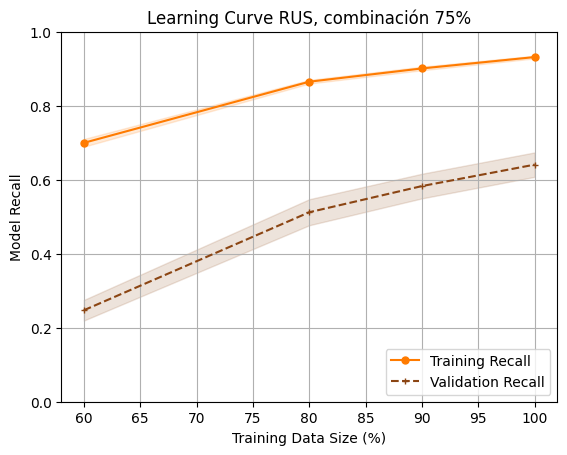

In [11]:
start = pd.Timestamp.now()

# Crear el modelo RANDOM FOREST - CV = 10
modeloRF = RandomForestClassifier(
  n_jobs = -1, # Utilizar todos los núcleos disponibles para acelerar el entrenamiento
  random_state = 42, # Semilla para la reproducibilidad de los resultados
  n_estimators=14, # Número de árboles en el bosque aleatorio
  criterion="gini", # Criterio para la selección del umbral de decisión
  max_features="sqrt",
  max_depth=20,
  min_samples_split=2,
  min_samples_leaf=2
  )

train_sizes_10 = [0.2, 0.4, 0.6, 0.8, 0.9, 1]

train_size_abs_10, train_scores_10, test_scores_10 = learning_curve(
    modeloRF, X_resampled, y_resampled, train_sizes=train_sizes_10, scoring='recall',
    cv=10, n_jobs=-1
    #n_jobs=4, pre_dispatch='2*n_jobs'
)

end = pd.Timestamp.now()
print(f"Duración búsqueda: {end-start}")

for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs_10, train_scores_10, test_scores_10
):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

# Suponiendo que 'train_size_abs_10' tiene los tamaños absolutos del conjunto de entrenamiento
total_data_size = max(train_size_abs_10)  # El tamaño total del conjunto de datos

# Convertir los tamaños de entrenamiento a porcentaje
train_size_pct_10 = (train_size_abs_10 / total_data_size) * 100

# Calcular los promedios y desviaciones estándar (ya lo tienes)
train_mean_10 = np.mean(train_scores_10, axis=1)
train_std_10 = np.std(train_scores_10, axis=1)
test_mean_10 = np.mean(test_scores_10, axis=1)
test_std_10 = np.std(test_scores_10, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_size_pct_10, train_mean_10, color='#FF7B00', marker='o', markersize=5, label='Training Recall')
plt.fill_between(train_size_pct_10, train_mean_10 + train_std_10, train_mean_10 - train_std_10, alpha=0.15, color='#FF7B00')

plt.plot(train_size_pct_10, test_mean_10, color='#8B4513', marker='+', markersize=5, linestyle='--', label='Validation Recall')
plt.fill_between(train_size_pct_10, test_mean_10 + test_std_10, test_mean_10 - test_std_10, alpha=0.15, color='#8B4513')

# Personalización del gráfico
plt.title('Learning Curve RUS, combinación 75%')
plt.xlabel('Training Data Size (%)')  # Cambiar la etiqueta del eje x
plt.ylabel('Model Recall')
plt.ylim(0, 1)
plt.grid()
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Duración búsqueda: 0 days 00:00:00.092753


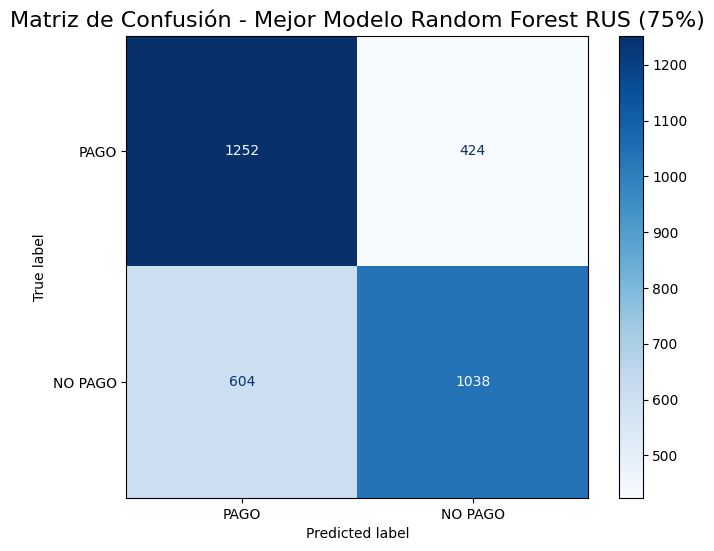

In [17]:
# ENTRENAR MEJORES MODELOS

# DF CON TRAIN_SIZE=0.75

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.75, random_state=42)

#Medir tiempo de ejecución
start = pd.Timestamp.now()

# Crear el mejor modelo
best_rf_75 = RandomForestClassifier(
    n_estimators=14,               # Número de árboles en el bosque
    criterion="gini",          # Criterio para la división de nodos ('entropy' para la ganancia de información)
    max_features="sqrt",          # Número de características a considerar en cada división ('sqrt' para la raíz cuadrada del número total de características)}
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=2,
    n_jobs = -1,
    random_state = 42
)

# Ajustar modelo
fit_75 = best_rf_75.fit(X_train, y_train)

#Medir tiempo de ejecución
end = pd.Timestamp.now()
print(f"Duración búsqueda: {end-start}")

# Matriz de confusión para model_grid.best_params_
y_pred = fit_75.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['PAGO', 'NO PAGO'])

# Graficar la matriz de confusión con un título
fig, ax = plt.subplots(figsize=(8, 6))  # Configurar el tamaño del gráfico
disp.plot(cmap="Blues", ax=ax)  # Asociar la visualización con los ejes del gráfico
ax.set_title("Matriz de Confusión - Mejor Modelo Random Forest RUS (75%)", fontsize=16)

# Mostrar el gráfico
plt.show()

MODELO 80% LC

Duración búsqueda: 0 days 00:00:02.240359
2388 samples were used to train the model
The average train accuracy is nan
The average test accuracy is nan
4777 samples were used to train the model
The average train accuracy is nan
The average test accuracy is nan
7166 samples were used to train the model
The average train accuracy is 0.58
The average test accuracy is 0.24
9555 samples were used to train the model
The average train accuracy is 0.82
The average test accuracy is 0.51
10749 samples were used to train the model
The average train accuracy is 0.87
The average test accuracy is 0.58
11944 samples were used to train the model
The average train accuracy is 0.91
The average test accuracy is 0.65


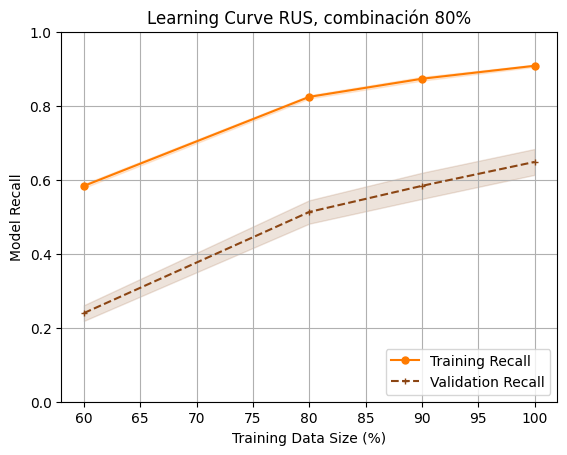

In [14]:
start = pd.Timestamp.now()

# Crear el modelo RANDOM FOREST - CV = 10
modeloRF = RandomForestClassifier(
  n_jobs = -1, # Utilizar todos los núcleos disponibles para acelerar el entrenamiento
  random_state = 42, # Semilla para la reproducibilidad de los resultados
  n_estimators=10, # Número de árboles en el bosque aleatorio
  criterion="entropy", # Criterio para la selección del umbral de decisión
  max_features="sqrt",
  max_depth=30,
  min_samples_split=10,
  min_samples_leaf=2
  )

train_sizes_10 = [0.2, 0.4, 0.6, 0.8, 0.9, 1]

train_size_abs_10, train_scores_10, test_scores_10 = learning_curve(
    modeloRF, X_resampled, y_resampled, train_sizes=train_sizes_10, scoring='recall',
    cv=10, n_jobs=-1
    #n_jobs=4, pre_dispatch='2*n_jobs'
)

end = pd.Timestamp.now()
print(f"Duración búsqueda: {end-start}")

for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs_10, train_scores_10, test_scores_10
):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

# Suponiendo que 'train_size_abs_10' tiene los tamaños absolutos del conjunto de entrenamiento
total_data_size = max(train_size_abs_10)  # El tamaño total del conjunto de datos

# Convertir los tamaños de entrenamiento a porcentaje
train_size_pct_10 = (train_size_abs_10 / total_data_size) * 100

# Calcular los promedios y desviaciones estándar (ya lo tienes)
train_mean_10 = np.mean(train_scores_10, axis=1)
train_std_10 = np.std(train_scores_10, axis=1)
test_mean_10 = np.mean(test_scores_10, axis=1)
test_std_10 = np.std(test_scores_10, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_size_pct_10, train_mean_10, color='#FF7B00', marker='o', markersize=5, label='Training Recall')
plt.fill_between(train_size_pct_10, train_mean_10 + train_std_10, train_mean_10 - train_std_10, alpha=0.15, color='#FF7B00')

plt.plot(train_size_pct_10, test_mean_10, color='#8B4513', marker='+', markersize=5, linestyle='--', label='Validation Recall')
plt.fill_between(train_size_pct_10, test_mean_10 + test_std_10, test_mean_10 - test_std_10, alpha=0.15, color='#8B4513')

# Personalización del gráfico
plt.title('Learning Curve RUS, combinación 80%')
plt.xlabel('Training Data Size (%)')  # Cambiar la etiqueta del eje x
plt.ylabel('Model Recall')
plt.ylim(0, 1)
plt.grid()
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Duración búsqueda: 0 days 00:00:00.076794


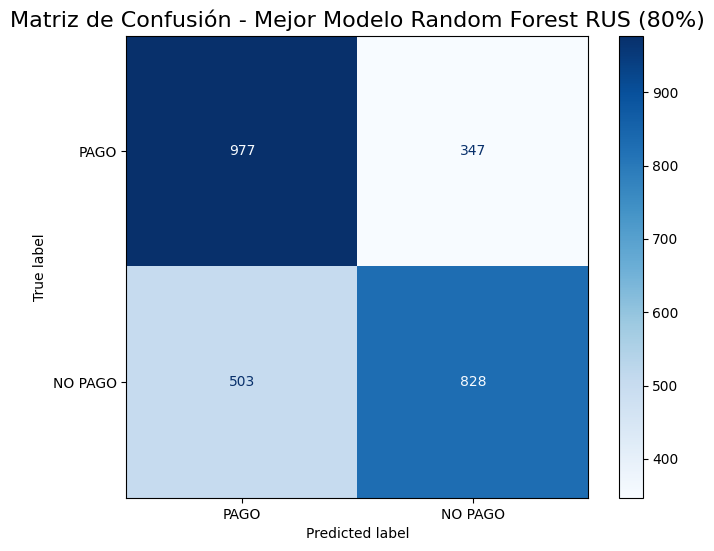

In [18]:
# ENTRENAR MEJORES MODELOS

# DF CON TRAIN_SIZE=0.80

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.80, random_state=42)

#Medir tiempo de ejecución
start = pd.Timestamp.now()

# Crear el mejor modelo
best_rf_80 = RandomForestClassifier(
    n_estimators=10,               # Número de árboles en el bosque
    criterion="entropy",          # Criterio para la división de nodos ('entropy' para la ganancia de información)
    max_features="sqrt",          # Número de características a considerar en cada división ('sqrt' para la raíz cuadrada del número total de características)}
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=2,
    n_jobs = -1,
    random_state = 42
)

# Ajustar modelo
fit_80 = best_rf_80.fit(X_train, y_train)

#Medir tiempo de ejecución
end = pd.Timestamp.now()
print(f"Duración búsqueda: {end-start}")

# Matriz de confusión para model_grid.best_params_
y_pred = fit_80.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['PAGO', 'NO PAGO'])

# Graficar la matriz de confusión con un título
fig, ax = plt.subplots(figsize=(8, 6))  # Configurar el tamaño del gráfico
disp.plot(cmap="Blues", ax=ax)  # Asociar la visualización con los ejes del gráfico
ax.set_title("Matriz de Confusión - Mejor Modelo Random Forest RUS (80%)", fontsize=16)

# Mostrar el gráfico
plt.show()

modelo 90%

Duración búsqueda: 0 days 00:00:01.403654
2388 samples were used to train the model
The average train accuracy is nan
The average test accuracy is nan
4777 samples were used to train the model
The average train accuracy is nan
The average test accuracy is nan
7166 samples were used to train the model
The average train accuracy is 0.42
The average test accuracy is 0.23
9555 samples were used to train the model
The average train accuracy is 0.59
The average test accuracy is 0.48
10749 samples were used to train the model
The average train accuracy is 0.64
The average test accuracy is 0.55
11944 samples were used to train the model
The average train accuracy is 0.70
The average test accuracy is 0.62


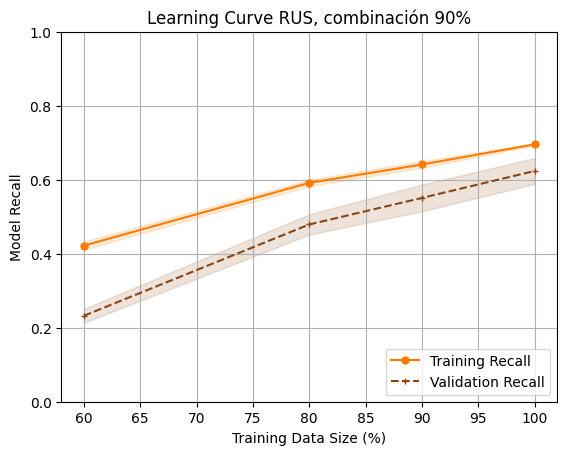

In [15]:
start = pd.Timestamp.now()

# Crear el modelo RANDOM FOREST - CV = 10
modeloRF = RandomForestClassifier(
  n_jobs = -1, # Utilizar todos los núcleos disponibles para acelerar el entrenamiento
  random_state = 42, # Semilla para la reproducibilidad de los resultados
  n_estimators=10, # Número de árboles en el bosque aleatorio
  criterion="gini", # Criterio para la selección del umbral de decisión
  max_features="sqrt",
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1
  )

train_sizes_10 = [0.2, 0.4, 0.6, 0.8, 0.9, 1]

train_size_abs_10, train_scores_10, test_scores_10 = learning_curve(
    modeloRF, X_resampled, y_resampled, train_sizes=train_sizes_10, scoring='recall',
    cv=10, n_jobs=-1
    #n_jobs=4, pre_dispatch='2*n_jobs'
)

end = pd.Timestamp.now()
print(f"Duración búsqueda: {end-start}")

for train_size, cv_train_scores, cv_test_scores in zip(
    train_size_abs_10, train_scores_10, test_scores_10
):
    print(f"{train_size} samples were used to train the model")
    print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
    print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

# Suponiendo que 'train_size_abs_10' tiene los tamaños absolutos del conjunto de entrenamiento
total_data_size = max(train_size_abs_10)  # El tamaño total del conjunto de datos

# Convertir los tamaños de entrenamiento a porcentaje
train_size_pct_10 = (train_size_abs_10 / total_data_size) * 100

# Calcular los promedios y desviaciones estándar (ya lo tienes)
train_mean_10 = np.mean(train_scores_10, axis=1)
train_std_10 = np.std(train_scores_10, axis=1)
test_mean_10 = np.mean(test_scores_10, axis=1)
test_std_10 = np.std(test_scores_10, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_size_pct_10, train_mean_10, color='#FF7B00', marker='o', markersize=5, label='Training Recall')
plt.fill_between(train_size_pct_10, train_mean_10 + train_std_10, train_mean_10 - train_std_10, alpha=0.15, color='#FF7B00')

plt.plot(train_size_pct_10, test_mean_10, color='#8B4513', marker='+', markersize=5, linestyle='--', label='Validation Recall')
plt.fill_between(train_size_pct_10, test_mean_10 + test_std_10, test_mean_10 - test_std_10, alpha=0.15, color='#8B4513')

# Personalización del gráfico
plt.title('Learning Curve RUS, combinación 90%')
plt.xlabel('Training Data Size (%)')  # Cambiar la etiqueta del eje x
plt.ylabel('Model Recall')
plt.ylim(0, 1)
plt.grid()
plt.legend(loc='lower right')

# Mostrar el gráfico
plt.show()

Duración búsqueda: 0 days 00:00:00.056849


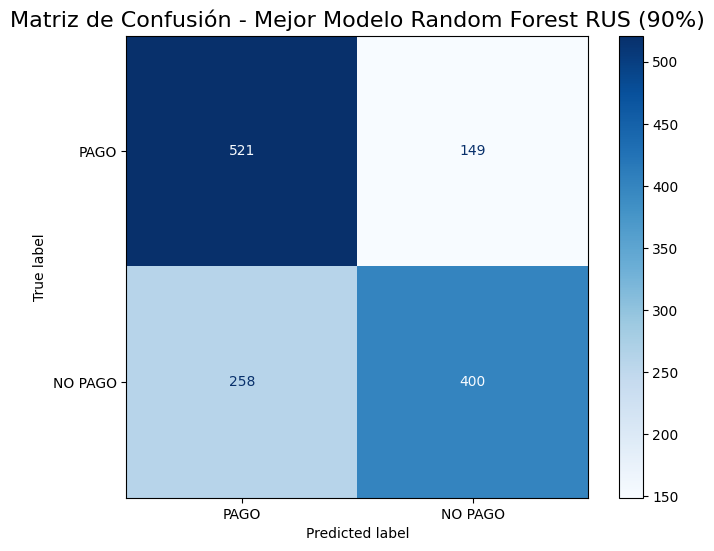

In [19]:
# ENTRENAR MEJORES MODELOS

# DF CON TRAIN_SIZE=0.90

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.90, random_state=42)

#Medir tiempo de ejecución
start = pd.Timestamp.now()

# Crear el mejor modelo
best_rf_90 = RandomForestClassifier(
    n_estimators=10,               # Número de árboles en el bosque
    criterion="gini",          # Criterio para la división de nodos ('entropy' para la ganancia de información)
    max_features="sqrt",          # Número de características a considerar en cada división ('sqrt' para la raíz cuadrada del número total de características)}
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs = -1,
    random_state = 42
)

# Ajustar modelo
fit_90 = best_rf_90.fit(X_train, y_train)

#Medir tiempo de ejecución
end = pd.Timestamp.now()
print(f"Duración búsqueda: {end-start}")

# Matriz de confusión para model_grid.best_params_
y_pred = fit_90.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['PAGO', 'NO PAGO'])

# Graficar la matriz de confusión con un título
fig, ax = plt.subplots(figsize=(8, 6))  # Configurar el tamaño del gráfico
disp.plot(cmap="Blues", ax=ax)  # Asociar la visualización con los ejes del gráfico
ax.set_title("Matriz de Confusión - Mejor Modelo Random Forest RUS (90%)", fontsize=16)

# Mostrar el gráfico
plt.show()

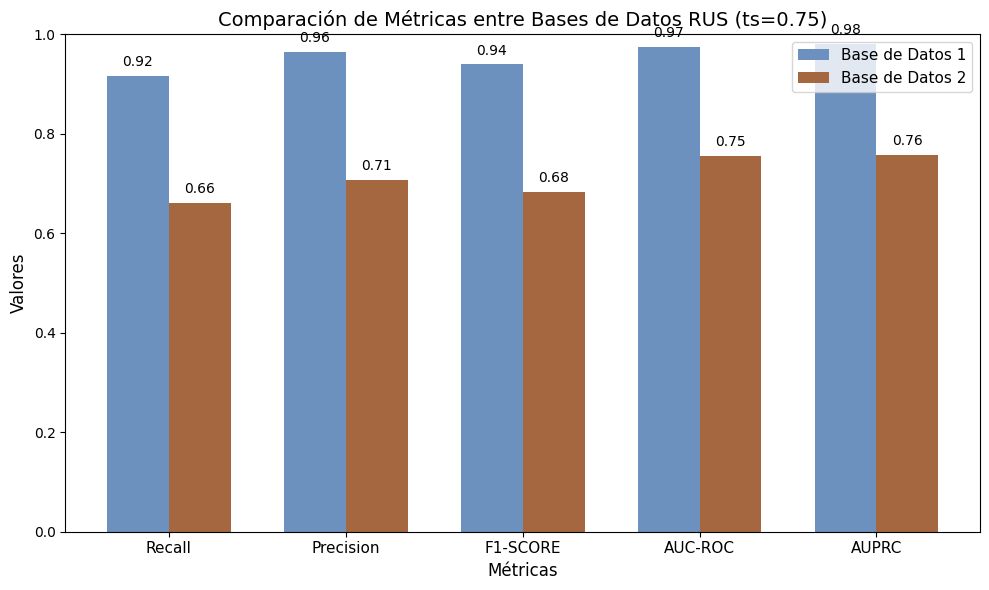

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las métricas para las dos bases de datos
metrics = ["Recall", "Precision", "F1-SCORE", "AUC-ROC", "AUPRC"]
db1_scores = [0.9167, 0.9644, 0.9394, 0.9749, 0.9814]  # Ejemplo de métricas para la base de datos 1
db2_scores = [0.6614, 0.7067, 0.6832, 0.7546, 0.7577]  # Ejemplo de métricas para la base de datos 2

# Configuración del gráfico
x = np.arange(len(metrics))  # Posiciones de las métricas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Colores en gama de azules y cafés
color_db1 = "#6C91BF"  # Azul
color_db2 = "#A5673F"  # Café

# Barras para las métricas de cada base de datos
bars1 = ax.bar(x - width/2, db1_scores, width, label="Base de Datos 1", color=color_db1)
bars2 = ax.bar(x + width/2, db2_scores, width, label="Base de Datos 2", color=color_db2)

# Etiquetas y formato
ax.set_xlabel("Métricas", fontsize=12)
ax.set_ylabel("Valores", fontsize=12)
ax.set_title("Comparación de Métricas entre Bases de Datos RUS (ts=0.75)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim(0, 1)  # Asumiendo que los valores están entre 0 y 1

# Añadir valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha="center", fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

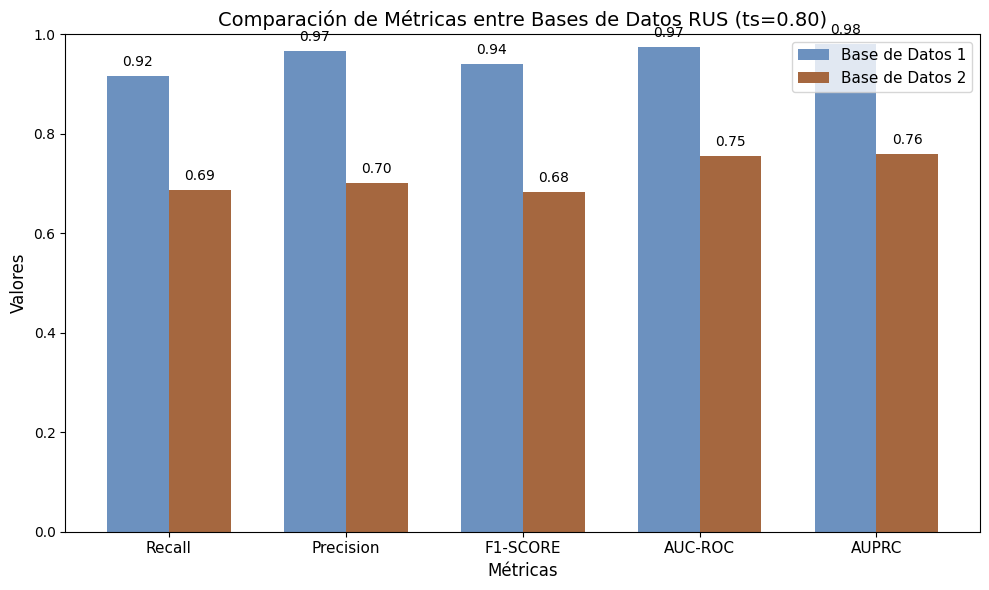

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las métricas para las dos bases de datos
metrics = ["Recall", "Precision", "F1-SCORE", "AUC-ROC", "AUPRC"]
db1_scores = [0.9162, 0.9665, 0.9396, 0.9746, 0.9802]  # Ejemplo de métricas para la base de datos 1
db2_scores = [0.6880, 0.7006, 0.6839, 0.7548, 0.7602]  # Ejemplo de métricas para la base de datos 2

# Configuración del gráfico
x = np.arange(len(metrics))  # Posiciones de las métricas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Colores en gama de azules y cafés
color_db1 = "#6C91BF"  # Azul
color_db2 = "#A5673F"  # Café

# Barras para las métricas de cada base de datos
bars1 = ax.bar(x - width/2, db1_scores, width, label="Base de Datos 1", color=color_db1)
bars2 = ax.bar(x + width/2, db2_scores, width, label="Base de Datos 2", color=color_db2)

# Etiquetas y formato
ax.set_xlabel("Métricas", fontsize=12)
ax.set_ylabel("Valores", fontsize=12)
ax.set_title("Comparación de Métricas entre Bases de Datos RUS (ts=0.80)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim(0, 1)  # Asumiendo que los valores están entre 0 y 1

# Añadir valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha="center", fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

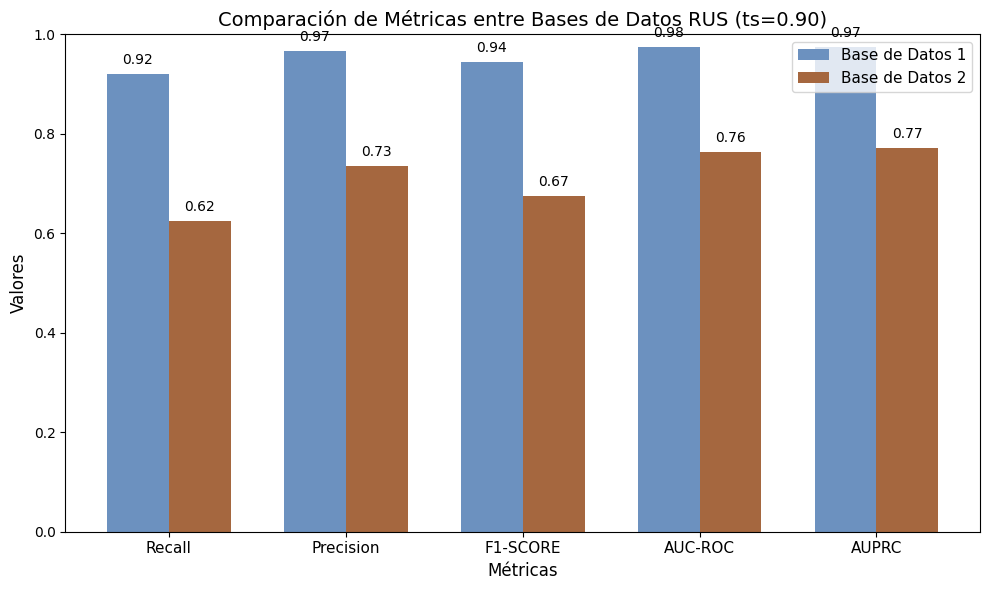

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de las métricas para las dos bases de datos
metrics = ["Recall", "Precision", "F1-SCORE", "AUC-ROC", "AUPRC"]
db1_scores = [0.9212, 0.9671, 0.9435, 0.9753, 0.9738]  # Ejemplo de métricas para la base de datos 1
db2_scores = [0.6240, 0.7344, 0.6747, 0.7631, 0.7712]  # Ejemplo de métricas para la base de datos 2

# Configuración del gráfico
x = np.arange(len(metrics))  # Posiciones de las métricas
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Colores en gama de azules y cafés
color_db1 = "#6C91BF"  # Azul
color_db2 = "#A5673F"  # Café

# Barras para las métricas de cada base de datos
bars1 = ax.bar(x - width/2, db1_scores, width, label="Base de Datos 1", color=color_db1)
bars2 = ax.bar(x + width/2, db2_scores, width, label="Base de Datos 2", color=color_db2)

# Etiquetas y formato
ax.set_xlabel("Métricas", fontsize=12)
ax.set_ylabel("Valores", fontsize=12)
ax.set_title("Comparación de Métricas entre Bases de Datos RUS (ts=0.90)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=11)
ax.legend(fontsize=11)
ax.set_ylim(0, 1)  # Asumiendo que los valores están entre 0 y 1

# Añadir valores sobre las barras
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.2f}", ha="center", fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()